<a href="https://colab.research.google.com/github/jdayllon/ai-saturdays-deeplearning/blob/main/W1_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning - Week 1 - Exercise**



## **Objective**

Deep Learning requires not only of a different aproach but also of a new set of tools to work with this kind of projects.

The main goal of this week is to know and use this tools, in order to solve a problem with less complexity.

## **TensorFlow**

![TensorFlow](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/TensorFlowLogo.svg/200px-TensorFlowLogo.svg.png)



> TensorFlow is a free and open-source software library for machine learning. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks. *- (Wikipedia)*

> TensorFlow is an end-to-end open source platform for machine learning. It has a comprehensive, flexible ecosystem of tools, libraries and community resources that lets researchers push the state-of-the-art in ML and developers easily build and deploy ML powered applications. *- (tensorflow.org)*

### History

Google Brain built DistBelief on 2011 as a proprietary machine learning system based on deep learning neural networks. Its use grew rapidly across diverse Google companies in both research and commercial applications.

The second-generation system of Google Brain division is TensorFlow, which was released on February 11, 2017: can run on multiple CPUs and GPUs and is available on 64-bit Linux, macOS, Windows, and mobile computing platforms including Android and iOS.


### Features

A big difference from other libraries used for Deep Learning, is that TensorFlow has a huge scalability. This is because it was designed to run locally or remotely with few changes on the code. In fact, when is runned locally it creates a local cluster of 1 node. 

Another important feature is related to the way that TensorFlow computations are expressed as stateful dataflow graphs.


## **Graphs**

In mathematics, and more specifically in graph theory, a graph is a structure amounting to a set of objects in which some pairs of the objects are in some sense "related".

The objects correspond to mathematical abstractions called *vertices* or *nodes*, and each of the related pairs of vertices is called an *edge* (also called link or line). Typically, a graph is depicted in diagrammatic form as a set of dots or circles for the vertices, joined by lines or curves for the edges. 

On the starting nodes are placed the data to solve the graph, like constants and variables. Then, on each step of the graph, there is a node with a specific operation to be performed and the lines connecting the right nodes to work as defined with the all graph.

In this example can be seen the graph form of a function:

![Graph function](https://www.simplilearn.com/ice9/free_resources_article_thumb/computational-graphs-for-tensorflow-operations.jpg)

At a first look this seems to be a complicated way to solve a function that can be easily expressed on one line of Python code.

But this way to build the solution for this function show some kind of *layers* between the starting nodes and the output node. This concept is  very useful on Deep Learning.

Another advantage of this mechanism is about to split or share the calculations over different devices, like CPUs or GPUs.

![Graph function cluster](https://www.simplilearn.com/ice9/free_resources_article_thumb/computational-graph-broken-into-chunks-for-parallel-computing.jpg)



## **TensorFlow Example**
In order to get familiarized with the structure and behaviour of the algoritms used on Deep Leaning, lets start with a simple function calculation:


$$
f(x,y) = x^2 y + y + 2
$$


As can be seen in the formula, there are a constant value and two variables: $x$ and $y$.

In this example we will learn the steps necesary to solve the function with diferent values on the variables.

### Example code

The first step, as usual in any Pyhton code, is to import the libraries to use.

In this case the imported library is TensorFlow and the standar alias is "tf".

In [1]:
import tensorflow as tf

The starting point in most Deep Learning projects is to define the type of data to be used.

Data can be of two different types:

- Constant: the value is unmodified during the calculations
- Variable: the value is modified when the calculations are performed

Going back to the function, $x$ and $y$ are variables and $2$ is a constant value.

An important thing to have in mind is that any variable must have an initial value, to avoid calculations with empty nodes.

The next step is to define this data.

In [2]:
# Define variable data, with the initial value = 0
x = tf.Variable(0) 
y = tf.Variable(0)

# Define constant data
c = tf.constant(2)


It's important to have in mind that most of the functions on TensorFlow work by pairs, which affect the way to construct the graph calculation.

In a regular Python code, the formula could be easily calculated as:

```python
f = (x ** 2) * y + y + 2
```

Using TensorFlow to achieve the same result is a little different, because each step can only include two objects.


In [3]:
# Build the graph
step1 = tf.math.multiply(x,x)
step2 = tf.math.multiply(step1,y)
step3 = tf.math.add(y,c)

f = tf.math.add(step2,step3)


Instead of use the regular Python math functions, the example is using the internal TensorFlow math functions.

At this point, this could seem a complicated way to perform a simple calculation. But this is just an example to understand the way TensorFlow works.

The TensorFlow math functions are specially designed to work with paralelism by default, this means that the same code could work in local CPU or GPU environments, as well in remote cluster computing solutions (cloud or private clusters).

The value of the function `f` can be shown converting the TensorFlow object to numpy:

In [4]:
print("f: ", f.numpy())

f:  2


The result is `2` because the $x$ and $y$ variables have an initial value of `0`. Solving the function manually it can be checked that the result is correct.

But what if $x$ and $y$ have a different value?

$$
f (3,4) = ?
$$

As doing maths with a paper and a pencil, the values have to be assigned to the variables.

This can be done as follows:


In [5]:
# Assign values to variables
x.assign(3)
y.assign(4)


<tf.Variable 'UnreadVariable' shape=() dtype=int32, numpy=4>

This is an important step because the variable was first declared and then a new value was assign to it.

This is very useful when working with complex calculations like the needed for Deep Learning.

The next step is to solve the function with the new values for $x$ and $y$.

In [6]:
# Build the graph
step1 = tf.math.multiply(x,x)
step2 = tf.math.multiply(step1,y)
step3 = tf.math.add(y,c)

f = tf.math.add(step2,step3)


Again, the solved value of $f(3,4)$ can be shown converting the final object to numpy.

In [7]:
print("f: ", f.numpy())

f:  42


At the end, assigning values and creating the graph each time seems not to be a good solution.

The regular way to work with the same piece of code again and again is to build a function.

For this porpouse, TensorFlow introduce a "decoration", declaration over a function, with the `@tf.function` statement previous to the function definition. This way the followed function will have a speacial treatment with an automatic graph creation and optimized to get the best performance posible on the environment where it is running.

This is the final function with all the previous steps included:

In [8]:
# Define variable data, with the initial value = 0
x = tf.Variable(0) 
y = tf.Variable(0)

# Define constant data
c = tf.constant(2)

# TF function
@tf.function
def f_function(x_value,y_value):

  # Assign values to variables
  x.assign(x_value)
  y.assign(y_value)
  
  # Build the graph
  step1 = tf.math.multiply(x,x)
  step2 = tf.math.multiply(step1,y)
  step3 = tf.math.add(y,c)

  f = tf.math.add(step2,step3)
  
  return f


Now the function can be used any time, just passing the values as a regular Python function.


In [9]:
# Testing f_function
f1 = f_function(3,4)

print("f1: ", f1.numpy())

f1:  42


### Linear Regression

When working with regular Machine Learning libraries like [Scikit-Learn](https://scikit-learn.org) the training of a model is a little bit simpler because a lot of internal operations are solved by the model itself.

Using Deep Learning libraries allows to build a model and train it, but again the model has to be built, step by step in order to be able to be used.


The first step is to create a sintetic dataset with data to train. This is a good practice to focus on the model and not in the data.

The dataset created can be shaped to fit the needs for testing the model.

In this case, the dataset correspond to a simple group of data around a line, with a random error.

In [10]:
### Linear Regression
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

# Generate sintetic train data
np.random.seed(3)
x_train = np.linspace(0, 10, 100)
y_train = x_train + np.random.normal(0,1,100)



Like any Machine Learning or Deep Learning project, a basic EDA can be done just visualizing the dataset.

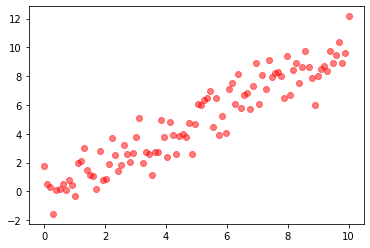

In [11]:
# View train data
plt.scatter(x_train, y_train, color='r', alpha=0.5)
plt.show()


To build the model is very important to define how long it would be running.

The model will perform calculations in each iteration, seeking to improve the result. This process repeats over and over, until a condition is reached.

As a general rule, one of this conditions are used to finish the iteration loop:

- The accuracy is equal or better to a predefined value.
- A maximum number of iterations is done.

> In the Deep Learning models, each iteration receive the name of *epoch*.

At the start of a project, to run a model until a predefined accuracy is obtained could be risky, because it could be working hours or days to get that condition. Sometimes the accuracy can't be reached and the model would be running endless.

In this case a maximum number of epochs is defined.

Another parameter defined is the *learning rate* which is kind of the amount of modification on each epoch.

In [12]:
# Parameters
learning_rate = 0.01
training_epochs = 3000


In the same way as explained on the previous example, the variables used in the model have to be defined as objects of the TensorFlow library.

Just for remember, the ecuation of a Linear Regression is the following:

$$
y = \beta * x + \alpha
$$

And also can be expressed as:

$$
y = \beta_{1} * x + \beta_{0}
$$

Having in mind the limitation to use greek characters, in the code is used:

$$
a = \alpha
\\
b = \beta
$$

Because of the similarity with the equation of a line, this variables also receive the following names:

$$
a, \alpha: \mathrm{Intercept}
\\
b, \beta: \mathrm{Slope}
$$

In each epoch this variables will be modified by the model trying to fit the resulting line to the data, looking for minimize the error.

Training the model means work in this variables.

In [13]:
# Initialyze coeficients with random values
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())


The next step is to define two very usefull functions.

The first one, called *linear_regression* is going to be used on each epoch to calculate the resultant dataset with the current `a` and `b` values.

This is needed to later calculate the error between the *trained* dataset and the initial one.

The second function is the one that calculates this error. In this case a mean square error is calculated between the *trained* or *predicted* dataset and the initial one.

In [14]:
# Update train values
def linear_regression(x):
  return b * x + a

# Calculate error
def squared_error(y_pred, y_true):
   return tf.reduce_mean(tf.square(y_pred - y_true))


With all the elements ready, the final step is to train the model.

In each epoch the `y_predicted` dataset is calculated, and then the `loss_function` calculate the error between this dataset and the initial one, called `y_train`.

After that the `a` and `b` variables are updated according to the `learning_rate` defined.

This is done over and over until the maximum number of `training_epochs` is reached.

In [15]:
# Train the model
for epoch in range(training_epochs):
  with tf.GradientTape() as g:
    y_predicted = linear_regression(x_train)
    loss_funtion = squared_error(y_predicted, y_train)
  
  # Update gradients
  gradients = g.gradient(loss_funtion, [b,a])

  # Update coeficients
  b.assign_sub(gradients[0]*learning_rate)
  a.assign_sub(gradients[1]*learning_rate)


After the model has been trained, it could be compared with the initial dataset.

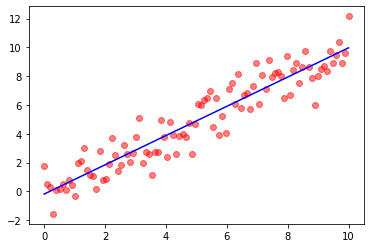

In [16]:
# View trained data
plt.scatter(x_train, y_train, color='r', alpha=0.5)
plt.plot(x_train, linear_regression(x_train), 'b')
plt.show()


As can be seen, the model was trained successfully.

The `learnig_rate` and the number of `training_epochs` can be modified to view a different behaviour of the model training.

## **Compare results**

Some of the best ways to learn something is by doing. Now is your turn.

Given the same dataset, you have to train a regular Machine Learning model and a Deep Learning model, both to solve a Linear Regression.

For the first case, [Scikit-Learn](https://scikit-learn.org) (aka sklearn) could be an option. For the second, TensorFlow could be a good option too.

As a check step, the values of the *slope* and *intercept* has to be shown for each model.

After that, you have to do a prediction with the trained model to find the corresponding value for the input equal to 5:

$$
y = f(5) = ?
$$

The last step is to calculate the difference between the predicted value of each model.

For this task, after each prediction with the correspondent model, store the predicted value on `ml_prediction` for the Machine Learning model and on `dl_prediction` for the Deep Learning model.

### Dataset

In order to work in a controlled environment, the dataset will be generated to easy work directly with the models.

In [17]:
### Linear Regression
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf

# Generate sintetic train data
np.random.seed(7)
x_train = np.linspace(0, 10, 100)
y_train = x_train * 0.75 + np.random.normal(0,1,100)


Again now, it's always a good idea to view the dataset to know a little bit more about the data to work with.


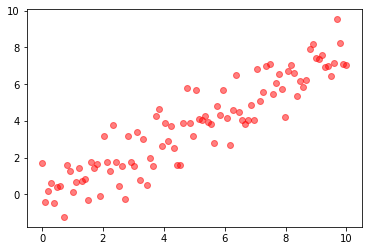

In [18]:
# View train data
plt.scatter(x_train, y_train, color='r', alpha=0.5)
plt.show()


### Machine Learning Solution



In [24]:
# Write your Machine Learning Solution here
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))

In [55]:
print(f"Intercept: {reg.intercept_[0]}, Slope: {reg.coef_[0][0]}")

ml_prediction = reg.predict(np.array([[5]]))[0][0]

Intercept: -0.17355958436873253, Slope: 0.7871250017772936


### Deep Learning Solution



In [38]:
# Write your Deep Learning Solution here

# Initialyze coeficients with random values
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

# Train the model
for epoch in range(training_epochs):
  with tf.GradientTape() as g:
    y_predicted = linear_regression(x_train)
    loss_funtion = squared_error(y_predicted, y_train)
  
  # Update gradients
  gradients = g.gradient(loss_funtion, [b,a])

  # Update coeficients
  b.assign_sub(gradients[0]*learning_rate)
  a.assign_sub(gradients[1]*learning_rate)

In [58]:
print(f"Intercept: {a.numpy()}, Slope: {b.numpy()}")

dl_prediction = linear_regression(5).numpy()

Intercept: -0.1735619157552719, Slope: 0.7871254086494446


### Difference

To compare the results of each model, calculate the difference between both results:


In [59]:
# Define predicted variables
# ml_prediction: Machine Learning prediction
# dl_prediction: Deep Learning prediction

print('ML Prediction:', ml_prediction)
print('DL Prediction:', dl_prediction)
print('')
print('Difference:', ml_prediction - dl_prediction)


ML Prediction: 3.7620654245177354
DL Prediction: 3.7620652

Difference: 2.523223008310538e-07


> The difference between each model is: **low**

---